<a href="https://colab.research.google.com/github/kthhtk/AIFFEL_Quest_cr/blob/master/Python/KerasTuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner import RandomSearch

In [3]:
# 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
model = keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))

### 모델 구성
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# 모델 학습
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=20,
    validation_split=0.2
)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4257 - loss: 1.5908 - val_accuracy: 0.5381 - val_loss: 1.3386
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6215 - loss: 1.0679 - val_accuracy: 0.5479 - val_loss: 1.3179
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6788 - loss: 0.9066 - val_accuracy: 0.5777 - val_loss: 1.2014
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7156 - loss: 0.8064 - val_accuracy: 0.6656 - val_loss: 0.9554
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7453 - loss: 0.7239 - val_accuracy: 0.6105 - val_loss: 1.2654
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7683 - loss: 0.6650 - val_accuracy: 0.6256 - val_loss: 1.1371
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7906 - loss: 0.5903 - val_accuracy: 0.6189 - val_loss: 1.3243
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8078 - loss: 0.5434 - val_accuracy: 0.

In [7]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7012 - loss: 1.2028
Test accuracy: 0.6995
Test loss: 1.2110


In [12]:
# 1. 드롭아웃 비율 수정
model = keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))  # 1. 드롭아웃 비율 수정: 0.2 -> 0.4
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


# 2. 학습률 수정
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # 0.001 -> 0.0005 으로 감소
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# 3. 배치 사이즈 수정
batch_size = 32  # 기본값 64에서 감소
# 4. 에포크 수 증가
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=40,  # 기존 20에서 증가
    validation_split=0.2
)


Epoch 1/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3962 - loss: 1.6680 - val_accuracy: 0.5680 - val_loss: 1.2226
Epoch 2/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5929 - loss: 1.1528 - val_accuracy: 0.6413 - val_loss: 1.0208
Epoch 3/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6544 - loss: 0.9920 - val_accuracy: 0.6709 - val_loss: 0.9290
Epoch 4/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6858 - loss: 0.8932 - val_accuracy: 0.6305 - val_loss: 1.0962
Epoch 5/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7153 - loss: 0.8135 - val_accuracy: 0.6519 - val_loss: 1.0142
Epoch 6/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7395 - loss: 0.7440 - val_accuracy: 0.6882 - val_loss: 0.8859
Epoch 7/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7504 - loss: 0.7104 - val_accuracy: 0.6834 - val_loss: 0.9261
Epoch 8/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7745 - loss: 0.6540 -

In [13]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7286 - loss: 1.0052
Test accuracy: 0.7289
Test loss: 1.0132


val_accuracy를 높이기 위해...


In [14]:
# 1. 데이터 증강은 모델의 첫 부분에 추가
model = keras.Sequential([
    # 데이터 증강 레이어를 가장 먼저 추가
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),

    # 기존 모델 구조
    layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),  # 드롭아웃 비율 0.5로 증가
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 2. 모델 컴파일
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Early Stopping 콜백 정의
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True  # 가장 좋은 가중치 복원
)

# 4. 모델 학습 시 콜백 적용
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=50, # 10 증가
    validation_split=0.2,
    callbacks=[early_stopping]  # 콜백 리스트에 추가
)


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.3514 - loss: 1.7980 - val_accuracy: 0.4901 - val_loss: 1.4287
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.4990 - loss: 1.3872 - val_accuracy: 0.5033 - val_loss: 1.4816
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5415 - loss: 1.2889 - val_accuracy: 0.5498 - val_loss: 1.3004
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5654 - loss: 1.2279 - val_accuracy: 0.6183 - val_loss: 1.0928
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5849 - loss: 1.1789 - val_accuracy: 0.6168 - val_loss: 1.1184
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5978 - loss: 1.1375 - val_accuracy: 0.6206 - val_loss: 1.1086
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6089 - loss: 1.1063 - val_accuracy: 0.6382 - val_loss: 1.0468
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6134 - loss: 1.0

val_acc 0.6으로 떨어짐

In [24]:
# 1. 모델 레이어
model = keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))  # 과적합 개선 1: 드롭아웃 비율 0.4->0.3으로 조정
model.add(layers.BatchNormalization())  # 과적합 개선 2: BatchNormalization 추가
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))  # val_acc 개선 1: Dense층 사이에 드롭아웃 추가
model.add(layers.Dense(10, activation='softmax'))

# 2. 학습률
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),  # val_acc 개선 2: learning rate 더 감소
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# 3. 배치 사이즈
batch_size = 32
# 4. 에포크 수
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=40,
    validation_split=0.2
)


Epoch 1/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3583 - loss: 1.9130 - val_accuracy: 0.5799 - val_loss: 1.2035
Epoch 2/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5566 - loss: 1.2629 - val_accuracy: 0.6078 - val_loss: 1.0975
Epoch 3/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6293 - loss: 1.0616 - val_accuracy: 0.6491 - val_loss: 1.0035
Epoch 4/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6676 - loss: 0.9550 - val_accuracy: 0.6092 - val_loss: 1.1021
Epoch 5/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6959 - loss: 0.8560 - val_accuracy: 0.6906 - val_loss: 0.8867
Epoch 6/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7204 - loss: 0.7890 - val_accuracy: 0.6796 - val_loss: 0.9117
Epoch 7/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7391 - loss: 0.7411 - val_accuracy: 0.7090 - val_loss: 0.8289
Epoch 8/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7587 - loss: 0.6899 -

In [26]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7319 - loss: 0.8818
Test accuracy: 0.7329
Test loss: 0.8885


이것저것 추가해봤더니, 학습만 오래걸리고 성과가 더딤

In [23]:
model = keras.Sequential([
    # 데이터 증강 레이어 - 더 다양한 augmentation 추가
    layers.RandomFlip("horizontal_and_vertical"),  # 수직 뒤집기 추가
    layers.RandomRotation(0.2),  # 회전각도 증가
    layers.RandomZoom(0.1),  # 확대/축소 추가
    layers.RandomBrightness(0.2),  # 밝기 변화 추가

    # 모델 구조 - 레이어 깊이와 정규화 강화
    layers.Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# 컴파일 - learning rate 조정 및 optimizer 변경
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # learning rate 감소
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early Stopping - patience 증가 및 모니터링 지표 변경
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # accuracy 기준으로 변경
    patience=10,  # patience 증가
    restore_best_weights=True,
    mode='max'  # accuracy 모니터링을 위해 mode 변경
)

# Learning Rate 감소 콜백 추가
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6
)

history = model.fit(
    x_train,
    y_train,
    batch_size=64,  # batch size 증가
    epochs=100,  # epoch 수 증가
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]  # 콜백 추가
)


Epoch 1/100


Exception ignored in: <function _xla_gc_callback at 0x7f4641bd9900>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 20ms/step - accuracy: 0.1020 - loss: 3.2297 - val_accuracy: 0.1097 - val_loss: 2.3075 - learning_rate: 1.0000e-04
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.0964 - loss: 2.8860 - val_accuracy: 0.0890 - val_loss: 2.3077 - learning_rate: 1.0000e-04
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.1006 - loss: 2.7668 - val_accuracy: 0.1104 - val_loss: 2.2995 - learning_rate: 1.0000e-04
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.1041 - loss: 2.6808 - val_accuracy: 0.1051 - val_loss: 2.2996 - learning_rate: 1.0000e-04
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.1242 - loss: 2.5677 - val_accuracy: 0.1842 - val_loss: 2.2028 - learning_rate: 1.0000e-04
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.1334 - loss: 2.5106 - val_accuracy: 0.2100 - val_loss: 2.2410 - learning_rate: 1.0000e-04
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - a

KeyboardInterrupt: 

In [27]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers

def build_model(hp):
    model = keras.Sequential()

    # Conv2D 필터 수를 튜닝
    filters = hp.Int('conv_1_units', min_value=16, max_value=64, step=16)
    model.add(layers.Conv2D(filters, kernel_size=3, activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())

    # 두 번째 Conv2D 레이어 필터 수 튜닝
    filters_2 = hp.Int('conv_2_units', min_value=32, max_value=128, step=32)
    model.add(layers.Conv2D(filters_2, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # 드롭아웃 비율 튜닝
    dropout_rate = hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())

    # Dense 레이어 유닛 수 튜닝
    units = hp.Int('dense_units', min_value=64, max_value=256, step=64)
    model.add(layers.Dense(units, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, activation='softmax'))

    # 학습률 튜닝
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# RandomSearch 객체 생성
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # 시도할 횟수
    directory='my_dir',
    project_name='cifar10_tuning'
)

# 탐색 시작
tuner.search(
    x_train,
    y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=32
)

# 최적의 하이퍼파라미터 확인
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# 최적의 모델 생성
best_model = build_model(best_hps)

# 최적의 모델 학습
history = best_model.fit(
    x_train,
    y_train,
    epochs=40,
    validation_split=0.2,
    batch_size=32
)


Trial 5 Complete [00h 02m 28s]
val_accuracy: 0.7142999768257141

Best val_accuracy So Far: 0.738099992275238
Total elapsed time: 00h 10m 10s
Epoch 1/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3039 - loss: 2.0920 - val_accuracy: 0.5303 - val_loss: 1.3301
Epoch 2/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4847 - loss: 1.4793 - val_accuracy: 0.5735 - val_loss: 1.2117
Epoch 3/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5463 - loss: 1.2878 - val_accuracy: 0.6149 - val_loss: 1.1075
Epoch 4/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5897 - loss: 1.1670 - val_accuracy: 0.6374 - val_loss: 1.0326
Epoch 5/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6211 - loss: 1.0757 - val_accuracy: 0.6609 - val_loss: 0.9764
Epoch 6/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6478 - loss: 1.0033 - val_accuracy: 0.6810 - val_loss: 0.9329
Epoch 7/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6629 - los

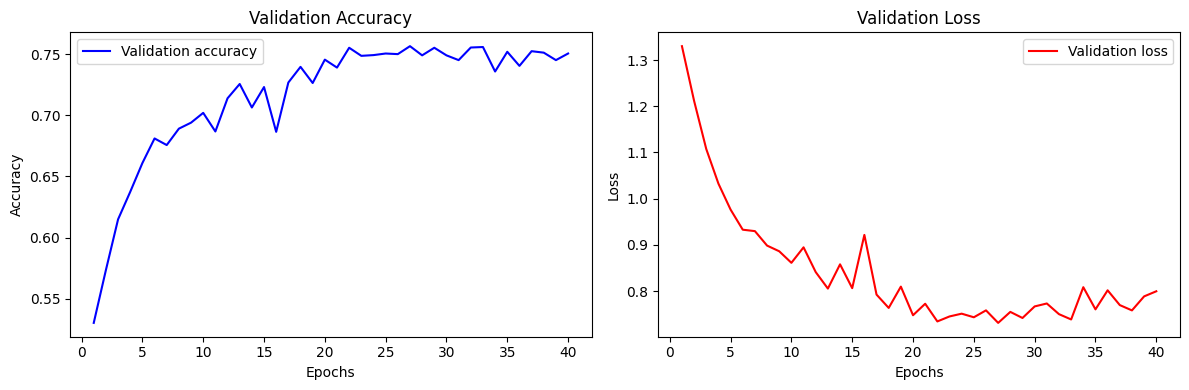

Final validation accuracy: 0.7504
Final validation loss: 0.7996


In [29]:
import matplotlib.pyplot as plt

# 학습 히스토리에서 정확도와 손실 값을 가져옴
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(1, len(val_acc) + 1)

# 그래프 그리기
plt.figure(figsize=(12, 4))

# validation accuracy 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# validation loss 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 최종 값 출력
print(f'Final validation accuracy: {val_acc[-1]:.4f}')
print(f'Final validation loss: {val_loss[-1]:.4f}')


회고
적절한 hp를, 적절하게 조정하고, 과적합을 조심하자?

정해진 시간과 목표가 무엇인지 잊지말자.